In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 直方图

histograms

In [ ]:
import statsmodels.api as sm

pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("data/landtemps2023avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# show some of the temperature rows 
landtemps[['station','country','latabs',
  'elevation','avgtemp']].\
  sample(10, random_state=1)

# generate some descriptive statistics on the temperatures data
landtemps.describe()
landtemps.avgtemp.skew()
landtemps.avgtemp.kurtosis()

# plot temperature averages
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

# run a qq-plot to examine where the distribution deviates from a normal distribution
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title("QQ Plot of Average Temperatures")
plt.show()

# show skewness and kurtosis for total_cases_pm
covidtotals.total_cases_pm.skew()
covidtotals.total_cases_pm.kurtosis()

# do a stacked histogram
showregions = ['Oceania / Aus','East Asia','Southern Africa',
  'Western Europe']

def getcases(regiondesc):
  return covidtotals.loc[covidtotals.\
    region==regiondesc,
    'total_cases_pm']

plt.hist([getcases(k) for k in showregions],\
  color=['blue','mediumslateblue','plum','mediumvioletred'],\
  label=showregions,\
  stacked=True)
plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# show multiple histograms on one figure
fig, axes = plt.subplots(2, 2)
fig.suptitle("Histograms of Covid Cases Per Million by Selected Regions")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].\
    total_cases_pm, bins=7)
  ax.set_title(showregions[j], fontsize=10)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# 方框图

boxplots

/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])


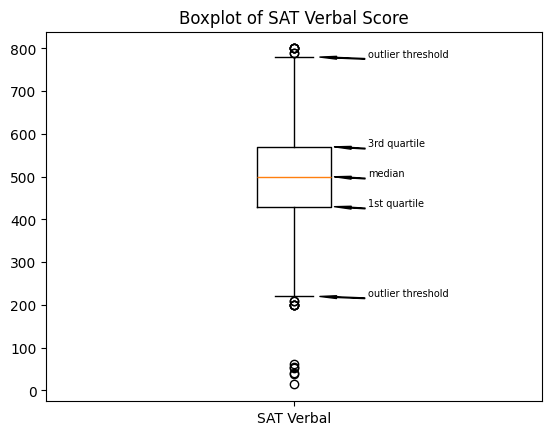

/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weeksworked.weeksworked20.dropna(),


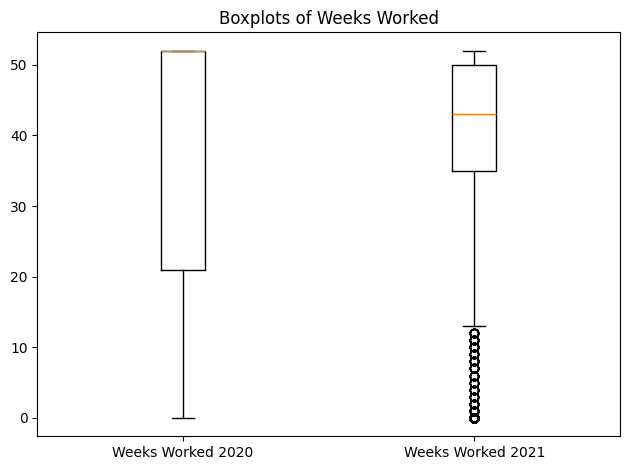

/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\


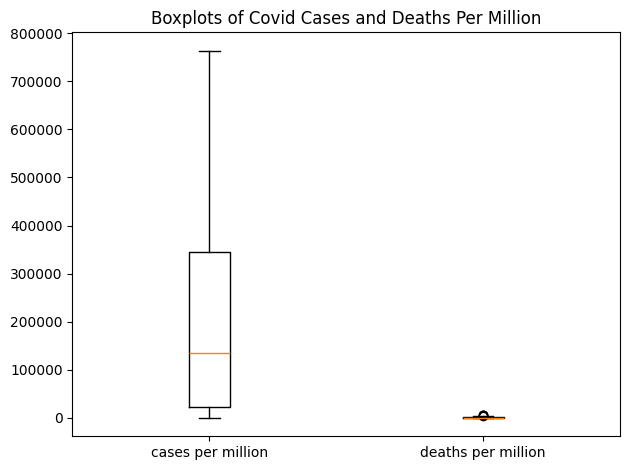

/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_30395/3586057387.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
/var/folders/3z/zm1dwk351

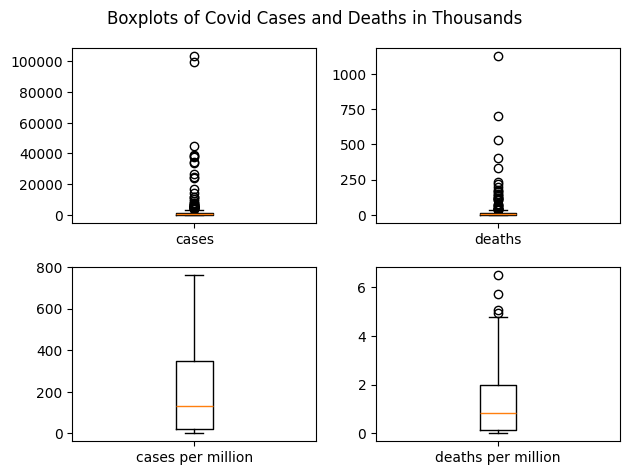

In [3]:
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97f.csv", low_memory=False)
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# do a boxplot for SAT verbal
nls97.satverbal.describe()

plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of SAT Verbal Score")
plt.show()

# show some descriptives on weeks worked
weeksworked = nls97.loc[:, ['highestdegree',
  'weeksworked20','weeksworked21']]
weeksworked.describe()

# do a box plot of weeks worked in 2020 and 2021
plt.boxplot([weeksworked.weeksworked20.dropna(),
  weeksworked.weeksworked21.dropna()],
  labels=['Weeks Worked 2020','Weeks Worked 2021'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

# show some descriptives on coronavirus cases
totvars = ['total_cases','total_deaths',
  'total_cases_pm','total_deaths_pm']
totvarslabels = ['cases','deaths',
  'cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

# do a box plot of cases and deaths per million
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

# show boxplots as separate sub plots on one figure
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths in Thousands")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## 分组方框图

grouped boxplots

In [ ]:
import seaborn as sns

pd.set_option('display.width', 72)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.1f}'.format
pd.set_option('mode.use_inf_as_na', False)
nls97 = pd.read_csv("data/nls97f.csv", low_memory=False)
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])

covidtotals.set_index("iso_code", inplace=True)

# view some descriptive statistics
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)

nls97.groupby(['highestdegree'])['weeksworked21'].\
  apply(gettots).unstack()

# do boxplots for weeks worked by highest degree earned
myplt = \
  sns.boxplot(x='highestdegree',y='weeksworked21',
  data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2021')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

# view minimum, maximum, median, and first and third quartile values
covidtotals.groupby(['region'])['total_cases_pm'].\
  apply(gettots).unstack()

# do boxplots for cases per million by region
covidtotals.total_cases_pm.describe()
covidtotals.region.value_counts(dropna=False)
sns.boxplot(x='total_cases_pm', y='region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals, size=2, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

covidtotals.total_cases_pm.describe()

highvalue = covidtotals.total_cases_pm.quantile(0.9)
highvalue

# show the most extreme value for covid totals
covidtotals.loc[covidtotals.total_cases_pm>=highvalue,\
  ['location','total_cases_pm']]

# do the same boxplots without the one extreme value in West Asia
sns.boxplot(x='total_cases_pm', y='region', data=covidtotals.loc[covidtotals.total_cases_pm<highvalue])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<highvalue], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# 小提琴图

violin plots

In [ ]:
import seaborn as sns

pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97f.csv", low_memory=False)
nls97.set_index("personid", inplace=True)


# do a violin plot of sat verbal scores
sns.violinplot(y=nls97.satverbal, color="wheat", orient="v")
plt.title("Violin Plot of SAT Verbal Score")
plt.ylabel("SAT Verbal")
plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), '3rd quartile', horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), 'Median', horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), '1st quartile', horizontalalignment='center', size='x-small')
plt.text(0.08, 210, 'outlier threshold', horizontalalignment='center', size='x-small')
plt.text(-0.4, 500, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

# get some descriptives
nls97.loc[:, ['weeksworked20','weeksworked21']].describe()

# show weeks worked for 2020 and 2021
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked20','weeksworked21']])
myplt.set_title("Violin Plots of Weeks Worked")
myplt.set_xticklabels(["Weeks Worked 2020","Weeks Worked 2021"])
plt.show()

# do a violin plot of wage income by gender
nls97["maritalstatuscollapsed"] = \
  nls97.maritalstatus.replace(['Married',
   'Never-married','Divorced','Separated',
   'Widowed'],\
  ['Married','Never Married','Not Married',
   'Not Married','Not Married']) 
sns.violinplot(x="gender", y="wageincome20", hue="maritalstatuscollapsed",
  data=nls97, scale="count")
plt.title("Violin Plots of Wage Income by Gender and Marital Status")
plt.xlabel('Gender')
plt.ylabel('Wage Income 2020')
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

# do a violin plot of weeks worked by degree attainment
nls97 = nls97.sort_values(['highestdegree'])
myplt = sns.violinplot(x='highestdegree',y='weeksworked21', data=nls97)
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
myplt.set_title("Violin Plots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2021')
plt.tight_layout()
plt.show()

# 散点图

scatter plots

In [ ]:
import numpy as np
import seaborn as sns

pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("data/landtemps2023avgs.csv")

# run a scatter plot latitude by avgtemp
plt.scatter(x="latabs", y="avgtemp", data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2023")
plt.show()

landtemps.shape

# show the high elevation points in a different color
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2023")
plt.show()

# show this as a 3D plot
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2023")
ax = plt.axes(projection='3d')
ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label="low elevation", c="blue")
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label="high elevation", c="red")
ax.legend()
plt.show()

# show scatter plot with a regression line
sns.regplot(x="latabs", y="avgtemp", color="blue", data=landtemps)
plt.title("Latitude and Average Temperature in 2023")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

# show scatter plot with different regression lines by elevation group
landtemps['elevation'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation", palette=dict(low="blue", high="red"),  facet_kws=dict(legend_out=False), data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2023")
plt.show()

# check some average temperatures above the regression lines
high.loc[(high.latabs>38) & \
  (high.avgtemp>=18),
  ['station','country','latabs',
  'elevation','avgtemp']]
low.loc[(low.latabs>47) & \
  (low.avgtemp>=14),
  ['station','country','latabs',
  'elevation','avgtemp']]

# check some average temperatures below the regression lines
high.loc[(high.latabs<5) & \
  (high.avgtemp<18),
  ['station','country','latabs',
  'elevation','avgtemp']]
low.loc[(low.latabs<50) & \
  (low.avgtemp<-9),
  ['station','country','latabs',
  'elevation','avgtemp']]

# 线图

line plots

In [ ]:
from matplotlib.dates import DateFormatter

pd.set_option('display.width', 72)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
coviddaily = pd.read_csv("data/coviddaily.csv", parse_dates=["casedate"])

# look at a couple of sample rows of the covid daily data
coviddaily.sample(2, random_state=1).T

# calculate new cases and deaths by day
coviddailytotals = \
  coviddaily.loc[coviddaily.casedate.\
    between('2023-07-01','2024-03-03')].\
  groupby(['casedate'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

coviddailytotals.sample(7, random_state=1)

# show line charts for new cases and new deaths by day
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide 2023-2024")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# calculate new cases and new deaths by region and day
regiontotals = \
  coviddaily.loc[coviddaily.casedate.\
    between('2023-07-01','2024-03-03')].\
  groupby(['casedate','region'])\
    [['new_cases','new_deaths']].\
  sum().\
  reset_index()

regiontotals.sample(7, random_state=1)

# show plot of new cases by selected regions
showregions = ['East Asia','Southern Africa',
  'North America','Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.\
    region==showregions[j],
    ['casedate','new_cases']]
  plt.plot(rt.casedate, rt.new_cases,
    label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2023-2024")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

sa = \
  coviddaily.loc[(coviddaily.casedate.\
    between('2023-01-01','2023-10-31')) & \
    (coviddaily.region=='South America'),
    ['casedate','new_cases']].\
  groupby(['casedate'])\
    [['new_cases']].\
  sum().\
  reset_index().\
  rename(columns={'new_cases':'sacases'})
  
br = coviddaily.loc[(coviddaily.\
  location=='Brazil') & \
  (coviddaily.casedate. \
  between('2023-01-01','2023-10-31')),
  ['casedate','new_cases']].\
  rename(columns={'new_cases':'brcases'})
sa = pd.merge(sa, br, left_on=['casedate'], right_on=['casedate'], how="left")
sa.fillna({"sacases": 0}, 
  inplace=True)
sa['sacasesnobr'] = sa.sacases-sa.brcases
#saabb = sa.loc[sa.casedate.between('2023-01-01','2023-10-01')]

fig = plt.figure()
ax = plt.subplot()
ax.stackplot(sa.casedate, sa.sacases, sa.sacasesnobr, labels=['Brazil','Other South America'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in South America in 2023")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# 热图

heat map

In [ ]:
import seaborn as sns

pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])

# generate a correlation matrix
corr = covidtotals.corr(numeric_only=True)
corr[['total_cases','total_deaths',
  'total_cases_pm','total_deaths_pm']]

# show scatter plots
fig, axes = plt.subplots(1,2, sharey=True)
sns.regplot(x="median_age", y="total_cases_pm", data=covidtotals, ax=axes[0])
sns.regplot(x="gdp_per_capita", y="total_cases_pm", data=covidtotals, ax=axes[1])
axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

# generate a heat map
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()